In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

Let's begin by putting all the constants that are given

In [2]:
m=40*1.66*1e-27
kb=1.38*1e-23
T=3
mu = 30*kb*T
A=3.5e+31
n=1


Then, simply define the fermi function

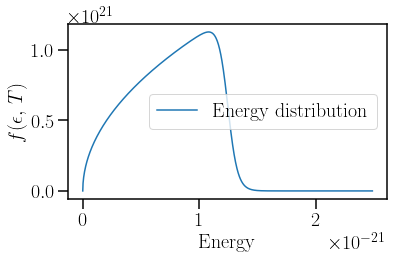

In [3]:
def f(epsilon, Temp):
    beta    = 1/(kb*Temp)
    numer   = A*np.sqrt(epsilon)
    denom   = np.exp(beta*(epsilon-mu)) + 1.0
    return numer/denom 

xfunc = np.linspace(0,2*mu,1000)
yfunc = f(xfunc,3)
plt.plot(xfunc,yfunc, label = "Energy distribution")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.tight_layout()
plt.legend()



For the first point, it is easier to show analitically that $f$ follows the Kolmogorov points ($f>0\forall x $, $\int_{\mathbb{R}} f = 1$)

For the second point, let's do a Monte Carlo code with a flat distribution. In principle, the energy goes from $0$ to $\infty$ but as we can see on figure above, after $\epsilon \approx 2\cdot\mu$, the function is roughly zero

In [4]:
def Egenerator(nEvents, Temp):
    listE =[]
    while len(listE)<nEvents :
        interval= (0, 2*mu)
        fmax    = np.max(f(np.linspace(0,3*mu,1000),3))*1.05
        gen     = np.random.default_rng()
        x       = gen.uniform(*interval)
        y       = gen.uniform(0, fmax)
        if y < f(x, Temp):
            listE.append(x)
    return listE        

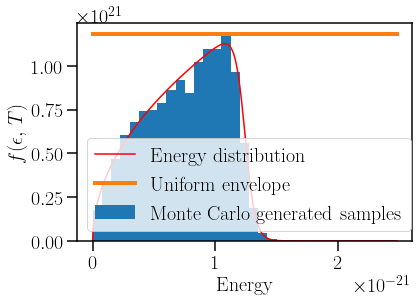

In [5]:
N       = 5000
nBins   = 20 
fmax    = np.max(f(np.linspace(0,3*mu,1000),3))*1.05

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
content,bin_edges, _ = plt.hist(Egenerator(N, 3), density=True, bins =nBins, label = "Monte Carlo generated samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=4)
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
#plt.tight_layout()
plt.legend()

To compute the mean, we compute numerically by doing 

$$
E(x) = \int x f(x) dx \approx \sum x f(x) \cdot \Delta x
$$

Where $f(x)$ = content, and $\Delta x$ is the bin width

The mean is :  7.468461431708698e-22  The theoretial mean is :  7.451999999999999e-22  The mean computed with numpy is :  7.445974392612457e-22


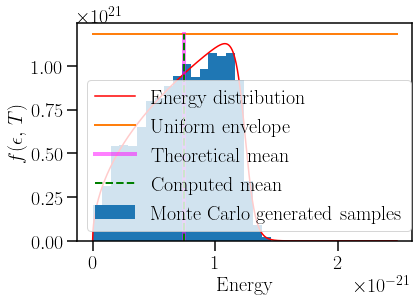

In [6]:
binWidth = (bin_edges[1] - bin_edges[0]) #/ nBins 
xCoords = bin_edges - binWidth/2

mean = np.sum(content*xCoords[1:]) *binWidth
meanTH = (3/5)*n*mu

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
plt.hist(Egenerator(N, 3), density=True, bins =nBins, label = "Monte Carlo generated samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=2)

plt.plot([meanTH, meanTH], [0, fmax], color = "magenta",alpha = 0.5, lw = 4, label = "Theoretical mean")
plt.plot([mean, mean], [0, fmax], '--', color = "green", lw = 2, label = "Computed mean")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()

m = np.mean(Egenerator(N,3))
print("The mean is : " ,mean, " The theoretial mean is : " , meanTH, " The mean computed with numpy is : ", m)


We see that the analysis is coherent and we could have used the function np.mean before ... --'


In [7]:
print(m/(kb*T))

17.985445392783717


We have : 
$$
\mathbb{E} = \dfrac{3}{5}n\mu = \dfrac{3}{5}n \cdot 30\,k_BT = 18 k_BT
$$
, Which is coherent with the result

In [8]:
v=np.var(Egenerator(N,3))
s=stats.skew(Egenerator(N,3))
k=stats.kurtosis(Egenerator(N,3))

print("variance = ", v , " skewness = ", s , " kurtosis = ", k)

variance =  1.1143300698364856e-43  skewness =  -0.2888943464670649  kurtosis =  -0.9272445124210869


In [9]:
stdev = np.sqrt(v)
stdev

3.3381582794057047e-22

Ex 2: 

Now we take the data points we managed to get. They are all distributed according to $f$, with a mean of $18\cdot k_B T$ and a variance $var \approx 1.07 \cdot 10^{-43}$

If we want to show the laws of large numbers, we can show that if we progressively compute the mean for a given number of samples ($N_{exp}=1$), then the average will converge to a number, which should be the mean.

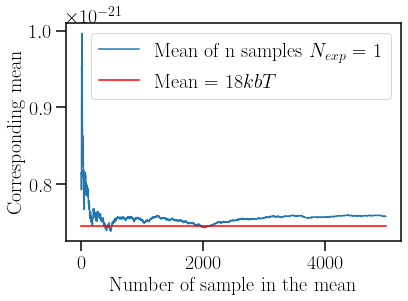

In [10]:
N=5000
data = Egenerator(N,3)
l = len(data)

listMean = []
for i in range(l):
    moy = np.mean(data[:i+1])
    listMean.append(moy)
xMean = np.linspace(0,N,N)

plt.plot(xMean, listMean, label = "Mean of n samples $N_{exp}$ = 1")
plt.plot([0,N],[18*kb*T,18*kb*T], color = "red", label = "Mean = $18 kb T$")
plt.xlabel("Number of sample in the mean")
plt.ylabel("Corresponding mean")
plt.legend()

It looks nice !

Now, we take $N_{exp} >> 1$, we will take for example 2000 experiment and every time, we will compute the mean and put it in a list

In the end, we put it in a histogram and see if it is a Gaussian.

In [11]:
def gauss(x, gmean, gsigma):
    pref = 1/(np.sqrt(2*np.pi)*gsigma)
    return pref*np.exp(-(x-gmean)*(x-gmean)/(2*gsigma*gsigma))


In [12]:

#Code takes a bit of time to run (1min30)
N=100
Nexp = 2000

k=1
listMean2 = []
while k<=Nexp :
    mean2 = np.mean(Egenerator(N,3))
    listMean2.append(mean2)
    k = k+1

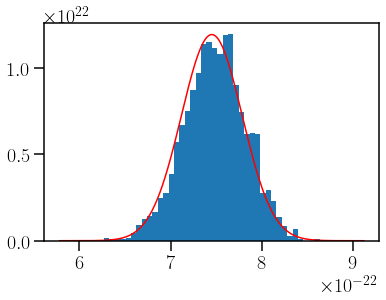

In [13]:
gsigma = stdev/np.sqrt(N)
gmean = meanTH
xplot = np.linspace(meanTH-5*gsigma, meanTH+5*gsigma, 1000)
yplot = gauss(xplot, gmean, gsigma)


plt.hist(listMean2, density=True, bins = 40)
plt.plot(xplot,yplot, color ="red")


This looks nice !

In [14]:
np.var(listMean2)/(gsigma**2)


1.0395881933621818

This is almost 1, that means that they are roughly the same

Ex3

Now, as it is suggested, let's take $N_{exp}=1$ and $N>>1$. Moreover, instead of computing the mean values of the bins by doing many experiments, let's take the pdf and set $f(\epsilon,T)$ as the mean.

Let's compute the $\chi^2$ for an experiment and we'll generalise later 

2.452021149612851e+38

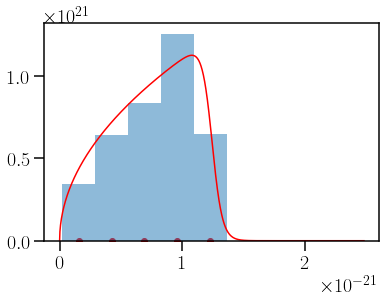

In [15]:
Nexp=1
N=500
data = Egenerator(N,T)
nBins = 5

content,edges = np.histogram(data, bins = nBins, density=True)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2
plt.hist(data, bins = nBins, density=True, alpha = 0.5)
plt.scatter(xExp, np.zeros(len(xExp))+1, color = "red")
plt.plot(xfunc,yfunc, color = "red")

#The observed value is content[i] and the coordinate xExp[i]
#The expected value is f(epsilon, T) at xExp[i]
#Compute the difference
chi2 = 0
for j in range(len(content)):
    fj = N*f(xExp[j],T)*width
    dif = np.power((content[j]-fj)/fj,2)
    chi2 = chi2 + dif

chi2



In [16]:
Nexp=200
N=200
nBins = 10
chiList = []

for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    width = edges[1]-edges[0]
    xExp = edges[:-1] + width/2
    chi2 = 0
    for j in range(len(content)):
        fj = N*f(xExp[j],T)*width
        dif = np.power((content[j]-fj)/fj,2)
        chi2 = chi2 + dif

    chiList.append(chi2)

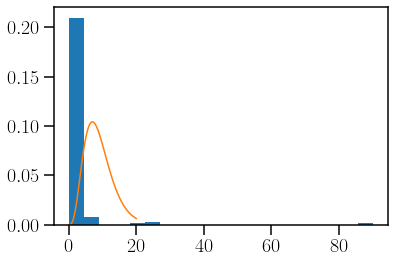

In [17]:
plt.hist(chiList, bins = 20, density=True)
chi2_x = np.linspace(*(0,20), 100)
chi2_y = stats.chi2.pdf(chi2_x, nBins-1)
plt.plot(chi2_x, chi2_y)

Exo 4

In [18]:
Nexp=1
N=1000
data = Egenerator(N,T)

In [19]:
def LLH(testData,Ttest):
    Loutput=0
    for i in range(0,len(testData)):
        Loutput+=math.log(f(testData[i],Ttest))
    return -Loutput

print (LLH(data,3))

-48158.409580574116


In [20]:
Ttest=np.linspace(0.5, 10, 200)
listLikeliHood = []

for i in range(len(Ttest)):
    l = LLH(data,Ttest[i])
    listLikeliHood.append(l)

indexLmin = listLikeliHood.index(min(listLikeliHood))
Lmin = min(listLikeliHood)

for i in range(len(Ttest)): #Normalize
    listLikeliHood[i] -= Lmin

print (Ttest[indexLmin],min(listLikeliHood))

2.6959798994974875 0.0


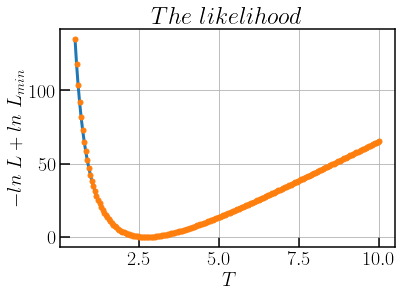

In [21]:
plt.plot(Ttest,listLikeliHood,'-',lw=3)
plt.plot(Ttest,listLikeliHood,'.',ms=10,lw=3)

plt.xlabel(r'$T$')
plt.ylabel(r'$-ln\ L+ln\ L_{min}$')
plt.title(r'$The\ likelihood$')

plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    

In [22]:
i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood[i]>0.5 and listLikeliHood[i+1]<0.5:
        i1=i
    if listLikeliHood[i]<0.5 and listLikeliHood[i+1]>0.5:
        i2=i

        
print ('The error of the estimation=',(Ttest[i2]-Ttest[i1])/2)

The error of the estimation= 0.3103015075376885


Let's now define a list of different $ \mu $  and for each one of them compute the least squares : 

$$
X = \sum \left(\dfrac{x-f(x)}{\sigma}\right)^2
$$


In [23]:
def calc_chi2(x, y, yerrs, param):
    chi2 = 0
    for i in range(len(x)):
        fct_value = f(x[i],param)
        chi2 += np.power((y[i] - fct_value) / yerrs[i], 2)
    return chi2

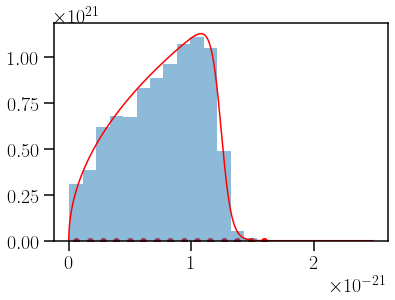

In [24]:
Nexp=1
N=5000
data = Egenerator(N,T)
nBins = 15

content,edges = np.histogram(data, bins = nBins, density=True)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2
plt.hist(data, bins = nBins, density=True, alpha = 0.5)
plt.scatter(xExp, np.zeros(len(xExp))+1, color = "red")
plt.plot(xfunc,yfunc, color = "red")


index for min :  28  min value for T=  3.186868686868687


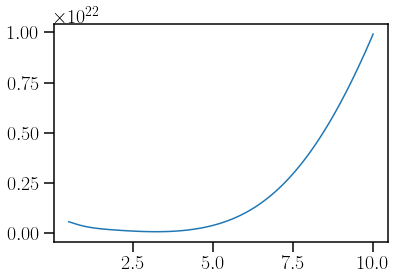

In [25]:
x=xExp
y=content
yerrs = np.sqrt(content)
params = np.linspace(0.5,10,100)

jmin = list(calc_chi2(x,y,yerrs,params)).index(min(calc_chi2(x,y,yerrs,params)))
calc_chi2(x,y,yerrs,params)[jmin]
print("index for min : " , jmin , " min value for T= ", params[jmin])

plt.plot(params, calc_chi2(x,y,yerrs,params))
    

Let's Compute the sample mean for different values of $ \mu $ and plot it

In [36]:
sample = np.linspace(0.5,10,100)
N = 500
listMean = []
for i in range(len(sample)):
    data = Egenerator(N, sample[i])
    listMean.append(np.mean(data))